# <span style="color:blue">**Linear Regression from scratch**</span>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.linear_model import Ridge, Lasso
from scipy import stats

### **Initialize Parameters**
This function is used to initialize the parameters for a linear regression model. It sets up the weights and bias with random values before starting the training process.

In [49]:
def initialize_parameters(n_features):
    w = np.random.randn(n_features)
    b = np.random.randn()
    return w, b

### **hypothesis function can be expressed mathematically as:**

$$
\hat{y} = x \cdot w + b
$$

where:

- $\hat{y}$ is the predicted value.
- $x$ is the vector of input features.
- $w$ is the vector of weights.
- $b$ is the bias term.

The dot product $x \cdot w$ calculates the weighted sum of the input features, and adding $b$ shifts this sum to produce the final prediction. This formula represents a linear combination of the input features, weighted by their corresponding weights, with an added bias term.


In [50]:
def predict(x, w, b):
    return np.dot(x, w) + b

### **Loss Function (Mean Squared Error)**

The loss function for linear regression is often chosen to be the Mean Squared Error (MSE). It measures the average of the squares of the errors between the predicted values $\hat{y}$ and the actual values $y$. The formula for MSE is given by:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:

- $n$ is the number of data points.
- $y_i$ is the actual value for the $i$-th data point.
- $\hat{y}_i$ is the predicted value for the $i$-th data point.



In [51]:
def compute_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

### **Compute Gradients with Regularization**

In linear regression, computing the gradients of the loss function with respect to the weights $w$ and bias $b$ is crucial for updating these parameters during optimization. Regularization techniques, such as L1 and L2 regularization, can be applied to prevent overfitting by penalizing large weights.

The gradients without regularization are given by:

$$
\frac{\partial J}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} x_i ( \hat{y}_i - y_i )
$$

$$
\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$

where:

- $J$ is the loss function (Mean Squared Error).
- $m$ is the number of data points.
- $x_i$ is the vector of input features for the $i$-th data point.
- $\hat{y}_i$ is the predicted value for the $i$-th data point.
- $y_i$ is the actual value for the $i$-th data point.

With L1 regularization, the gradient for the weights $w$ is modified as follows:

$$
\frac{\partial J}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} x_i ( \hat{y}_i - y_i ) + \lambda \cdot \text{sign}(w)
$$

With L2 regularization, the gradient for the weights $w$ is modified as follows:

$$
\frac{\partial J}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} x_i ( \hat{y}_i - y_i ) + 2\lambda w
$$



In [52]:
def compute_gradients(x, y_true, y_pred, w, lambda_reg, regularization='none'):
    m = len(y_true)
    error = y_pred - y_true
    dw = (2/m) * np.dot(x.T, error)
    db = (2/m) * np.sum(error)
    
    if regularization == 'l1':
        dw += lambda_reg * np.sign(w)  # L1 regularization
    elif regularization == 'l2':
        dw += 2 * lambda_reg * w  # L2 regularization
    
    return dw, db

### **Update Parameters**

In gradient descent optimization, the weights $w$ and bias $b$ are updated iteratively to minimize the loss function. The updates are made in the direction of the negative gradients, scaled by a learning rate $\alpha$.

The update rules for the weights and bias are given by:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where:

- $w$ is the vector of weights.
- $b$ is the bias term.
- $\alpha$ is the learning rate.
- $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ are the gradients of the loss function with respect to the weights and bias, respectively.




In [53]:
def update_parameters(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

### **Gradient Descent Loop**

Gradient descent is an iterative optimization algorithm used to minimize the loss function by updating model parameters (weights and bias). The algorithm adjusts the parameters based on the gradients computed from the loss function.

The gradient descent loop can be summarized as follows:

1. **Initialize**: Start with initial weights $w$ and bias $b$.

2. **Loop**:
    - **Predict**: Compute the predicted values $\hat{y}$ using the current weights and bias.
    - **Compute Loss**: Calculate the loss using the Mean Squared Error (MSE) or other loss functions.
    - **Compute Gradients**: Calculate the gradients of the loss function with respect to the weights and bias.
    - **Update Parameters**: Adjust the weights and bias by subtracting the product of the learning rate and their respective gradients.
    - **Record Loss**: Store the loss value to track the optimization progress.

The loop is executed for a specified number of epochs. At each epoch, the following updates are performed:

$$
\hat{y} = x \cdot w + b
$$

$$
\text{Loss} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
\frac{\partial \text{Loss}}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} x_i (\hat{y}_i - y_i) + \text{Regularization Term}
$$

$$
\frac{\partial \text{Loss}}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$

$$
w := w - \alpha \frac{\partial \text{Loss}}{\partial w}
$$

$$
b := b - \alpha \frac{\partial \text{Loss}}{\partial b}
$$


In [54]:
def gradient_descent(x, y, w, b, learning_rate, epochs, lambda_reg, regularization):
    loss_history = []
    for i in range(epochs):
        y_pred = predict(x, w, b)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(x, y, y_pred, w, lambda_reg, regularization)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        loss_history.append(loss)
        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss}")
    return w, b, loss_history

### **Advanced Visualization of Results**

The function `plot_results` is designed to provide a comprehensive view of the results from linear regression. It includes various visualizations to help assess model performance and interpret the results.

1. **Loss Over Epochs**:
   - This plot shows how the loss decreases over the epochs during training. It helps in understanding whether the model is converging and how the optimization process is progressing.
   - The loss function used is typically Mean Squared Error (MSE).

   $$ 
   \text{Loss} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 
   $$

2. **Predicted vs Actual (Training Set)**:
   - This scatter plot shows the predicted values against the actual values for the training set.
   - The diagonal line ($y = x$) represents perfect predictions where predicted values equal actual values.

   $$ 
   \text{Predicted} = \hat{y} 
   $$

   $$ 
   \text{Actual} = y 
   $$

3. **Predicted vs Actual (Test Set)**:
   - This scatter plot shows the predicted values against the actual values for the test set.
   - It helps in assessing the model's performance on unseen data.

4. **Histogram of Residuals**:
   - This histogram displays the distribution of residuals (errors) in the test set.
   - Residuals are calculated as:

   $$ 
   \text{Residuals} = y_{\text{test}} - \hat{y}_{\text{test}} 
   $$

   - A well-performing model should have residuals that are approximately normally distributed with a mean of zero.

5. **Learning Curve**:
   - This plot shows the learning curve, which is similar to the Loss Over Epochs plot but can be used to visualize training and validation loss if applicable.
   - It provides insights into how the model's performance evolves over time.

6. **Feature Importance**:
   - This bar plot shows the importance of each feature based on the magnitude of the coefficients in the linear model.
   - Larger coefficients (either positive or negative) indicate greater importance.

   $$ 
   \text{Feature Importance} \approx \text{Magnitude of Coefficients} 
   $$




In [55]:
def plot_results(x_train, y_train, x_test, y_test, w, b, loss_history):
    plt.figure(figsize=(18, 14))
    
    # Plot loss over epochs
    plt.subplot(3, 2, 1)
    plt.plot(range(len(loss_history)), loss_history, color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    
    # Predictions vs Actual for training set
    y_train_pred = predict(x_train, w, b)
    plt.subplot(3, 2, 2)
    plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Training Set)')
    plt.legend()
    
    # Predictions vs Actual for test set
    y_test_pred = predict(x_test, w, b)
    plt.subplot(3, 2, 3)
    plt.scatter(y_test, y_test_pred, color='red', label='Test data')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Test Set)')
    plt.legend()
    
    # Histogram of residuals
    residuals = y_test - y_test_pred
    plt.subplot(3, 2, 4)
    plt.hist(residuals, bins=20, color='orange')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    
    # Learning curve
    plt.subplot(3, 2, 5)
    plt.plot(range(len(loss_history)), loss_history, color='purple')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    
    # Feature importance (using coefficients)
    plt.subplot(3, 2, 6)
    plt.bar(range(len(w)), w, color='cyan')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title('Feature Importance')
    
    plt.tight_layout()
    plt.show()


### **Model Evaluation Metrics**

Evaluating the performance of a regression model involves calculating several key metrics to understand how well the model's predictions match the actual values. The following metrics are commonly used:

1. **Mean Squared Error (MSE)**:
   - MSE measures the average of the squares of the errors, which are the differences between predicted and actual values.
   
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
   $$

   where:
   - $n$ is the number of data points.
   - $\hat{y}_i$ is the predicted value for the $i$-th data point.
   - $y_i$ is the actual value for the $i$-th data point.

   MSE penalizes larger errors more heavily due to the squaring term, making it sensitive to outliers.

2. **Mean Absolute Error (MAE)**:
   - MAE measures the average magnitude of the errors without considering their direction. It is the average of the absolute differences between predicted and actual values.
   
   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i|
   $$

   MAE is less sensitive to outliers compared to MSE, as it does not square the errors.

3. **R-squared (R²)**:
   - R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables. It indicates how well the model explains the variability of the response data.
   
   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
   $$

   where:
   - $\bar{y}$ is the mean of the actual values.
   - The numerator is the residual sum of squares.
   - The denominator is the total sum of squares.

   An R² value of 1 indicates perfect predictions, while a value of 0 indicates that the model does not explain any of the variability in the response variable.



In [56]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

### **Feature Selection Based on Feature Importance**

Feature selection is a process of identifying and selecting the most important features for building a predictive model. One common approach is to use feature importance, which is derived from the model's coefficients in linear regression.

In linear regression, the importance of a feature can be interpreted as the absolute value of its coefficient. Higher absolute values indicate greater importance of the corresponding feature in predicting the target variable.

The process for feature selection based on feature importance can be summarized as follows:

1. **Calculate Feature Importances**:
   - The importance of each feature is computed as the absolute value of the corresponding coefficient.
   
   $$
   \text{Importance}_j = |\text{w}_j|
   $$

   where:
   - $\text{w}_j$ is the coefficient of the $j$-th feature.

2. **Select Features**:
   - Compare each feature's importance to a given threshold. Features with importance values above the threshold are selected for the model.
   
   $$
   \text{Selected}_j = 
   \begin{cases} 
   \text{True} & \text{if } |\text{w}_j| > \text{threshold} \\
   \text{False} & \text{otherwise}
   \end{cases}
   $$

   where `threshold` is a predefined value that determines which features are considered important.


In [57]:
def feature_selection(x, y, w, threshold=0.1):
    importances = np.abs(w)
    selected_features = importances > threshold
    return x[:, selected_features], selected_features

### **Prediction Error Analysis**

Prediction error analysis helps in understanding the nature and distribution of errors made by a regression model. Two common plots used for this analysis are:

1. **Residuals vs Predicted Plot**:
   - This plot shows the residuals (errors) on the y-axis and the predicted values on the x-axis. It helps in diagnosing patterns in residuals which may indicate model problems such as non-linearity, heteroscedasticity, or autocorrelation.

   The residual for each data point is calculated as:
   
   $$
   \text{Residual}_i = y_i - \hat{y}_i
   $$

   where:
   - $y_i$ is the actual value for the $i$-th data point.
   - $\hat{y}_i$ is the predicted value for the $i$-th data point.

   A well-fitting model should have residuals randomly scattered around zero without any apparent pattern.

2. **Q-Q Plot**:
   - The Quantile-Quantile (Q-Q) plot compares the distribution of residuals to a normal distribution. If the residuals are normally distributed, the points will fall approximately along a straight line.

   The Q-Q plot compares:
   
   $$
   \text{Quantiles of Residuals} \text{ vs } \text{Quantiles of Normal Distribution}
   $$

   Deviations from the straight line indicate departures from normality.


In [58]:
def prediction_error_analysis(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 6))
    
    # Residuals vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()


### **Learning Curves Plot**

Learning curves are graphical representations of a model's performance over time during training. They help in understanding how the model's error (or loss) changes with increasing epochs, and provide insights into the model's learning process.

### Learning Curve

The learning curve typically plots the training loss or error against the number of epochs. It helps in diagnosing various aspects of the training process:

1. **Overfitting**: If the training loss continues to decrease while the validation loss starts increasing, the model may be overfitting.
2. **Underfitting**: If both training and validation losses are high and do not decrease, the model may be underfitting.
3. **Convergence**: A smoothly decreasing loss indicates that the model is converging and learning effectively.

The loss function used in the learning curve is often Mean Squared Error (MSE), defined as:

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

where:

- \( n \) is the number of data points.
- \( \hat{y}_i \) is the predicted value for the \( i \)-th data point.
- \( y_i \) is the actual value for the \( i \)-th data point.




In [59]:
def plot_learning_curves(loss_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(loss_history)), loss_history, color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.show()

### **Hyperparameter Tuning with Grid Search**

Hyperparameter tuning is a crucial step in optimizing the performance of machine learning models. Grid Search is a systematic approach to finding the best combination of hyperparameters by evaluating all possible combinations in a predefined grid.

### Grid Search for Ridge Regression

Ridge Regression, also known as L2 regularization, is a technique that adds a penalty term to the loss function to constrain the magnitude of the coefficients. The key hyperparameters to tune for Ridge Regression include:

1. **Regularization Strength (\(\alpha\))**:
   - This parameter controls the amount of regularization applied to the model. Higher values increase the regularization strength, which can help prevent overfitting by shrinking the coefficients.

   $$
   \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \alpha \sum_{j=1}^{p} w_j^2
   $$

   where:
   - \( \alpha \) is the regularization parameter.
   - \( w_j \) are the model coefficients.

2. **Fit Intercept**:
   - This parameter determines whether to include an intercept (bias term) in the model. Including the intercept is generally recommended unless there is a specific reason not to.

### Grid Search Process

1. **Define Parameter Grid**:
   - Create a dictionary of parameters to search over, specifying the values for each hyperparameter.

2. **Perform Grid Search**:
   - Use `GridSearchCV` to evaluate the model across all combinations of parameters in the grid using cross-validation. The best combination is selected based on the performance metric.



In [60]:
def hyperparameter_tuning(x_train, y_train):
    parameters = {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Regularization strength
        'fit_intercept': [True, False]  # Whether to include bias term
    }
    
    # Grid search for Ridge Regression
    ridge = Ridge()
    grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    
    print("Best Parameters for Ridge Regression:", grid_search.best_params_)
    
    return grid_search.best_params_


### **Regularization Comparison**

Regularization is a technique used to prevent overfitting by adding a penalty to the loss function. In Ridge Regression, this penalty is controlled by the parameter \(\alpha\), which determines the strength of the regularization. Comparing different values of \(\alpha\) helps in understanding how regularization affects model performance.

### Regularization Comparison Plot

The comparison plot evaluates the Mean Squared Error (MSE) for different values of \(\alpha\) on both training and test datasets. This helps in identifying the optimal \(\alpha\) that balances the trade-off between bias and variance.

1. **Mean Squared Error (MSE)**:
   - The MSE for a given \(\alpha\) is calculated as:

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
   $$

   where:
   - \( n \) is the number of data points.
   - \( \hat{y}_i \) is the predicted value for the \( i \)-th data point.
   - \( y_i \) is the actual value for the \( i \)-th data point.

2. **Plotting**:
   - The plot shows how MSE changes with different values of \(\alpha\), providing insights into the effect of regularization strength on model performance.




In [61]:
def compare_regularization(x_train, y_train, x_test, y_test):
    alphas = [0.1, 0.5, 1.0, 5.0, 10.0]
    mse_train = []
    mse_test = []
    
    for alpha in alphas:
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(x_train, y_train)
        y_train_pred = model_ridge.predict(x_train)
        y_test_pred = model_ridge.predict(x_test)
        
        mse_train.append(mean_squared_error(y_train, y_train_pred))
        mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mse_train, marker='o', label='Training MSE')
    plt.plot(alphas, mse_test, marker='o', label='Test MSE')
    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Mean Squared Error')
    plt.title('Regularization Comparison')
    plt.legend()
    plt.show()



### **Save and Load Model**

In [62]:
def save_model(w, b, filename='model.pkl'):
    joblib.dump({'weights': w, 'bias': b}, filename)
    print(f"Model saved to {filename}")

In [63]:
def load_model(filename='model.pkl'):
    model = joblib.load(filename)
    print(f"Model loaded from {filename}")
    return model['weights'], model['bias']


### **Load California Housing dataset**

In [64]:
housing = fetch_california_housing()
x = housing.data
y = housing.target

### **Polynomial features**

In [65]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

### **Normalize features**

In [66]:
scaler = StandardScaler()
x_poly = scaler.fit_transform(x_poly)

### **Split the data into training and testing sets**

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

### **Initialize parameters**

In [68]:
w, b = initialize_parameters(x_train.shape[1])

### **Gradient Descent with regularization**

In [69]:
learning_rate = 0.01
epochs = 1000
lambda_reg = 0.1  # Regularization strength
regularization = 'l2'  # 'l1', 'l2', or 'none'

w, b, loss_history = gradient_descent(x_train, y_train, w, b, learning_rate, epochs, lambda_reg, regularization)

Epoch 0: Loss = 30.632912956212127
Epoch 100: Loss = 1.022106371971104
Epoch 200: Loss = 0.6986945397886166
Epoch 300: Loss = 0.6095384151187776
Epoch 400: Loss = 0.5690634946076442
Epoch 500: Loss = 0.5488103063311853
Epoch 600: Loss = 0.5382195858798078
Epoch 700: Loss = 0.532532145665407
Epoch 800: Loss = 0.5294377061602711
Epoch 900: Loss = 0.5277565931495722


### **Make predictions**

In [70]:
y_train_pred = predict(x_train, w, b)
y_test_pred = predict(x_test, w, b)


### **Evaluate Model**

In [71]:
mse_train, mae_train, r2_train = evaluate_model(y_train, y_train_pred)
mse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred)

print(f"Training MSE: {mse_train}, MAE: {mae_train}, R^2: {r2_train}")
print(f"Test MSE: {mse_test}, MAE: {mae_test}, R^2: {r2_test}")

Training MSE: 0.5268616921666209, MAE: 0.5314281776602163, R^2: 0.6063412199011902
Test MSE: 0.6404107404901003, MAE: 0.5415351767085563, R^2: 0.5088704836699145


### **Advanced visualizations**

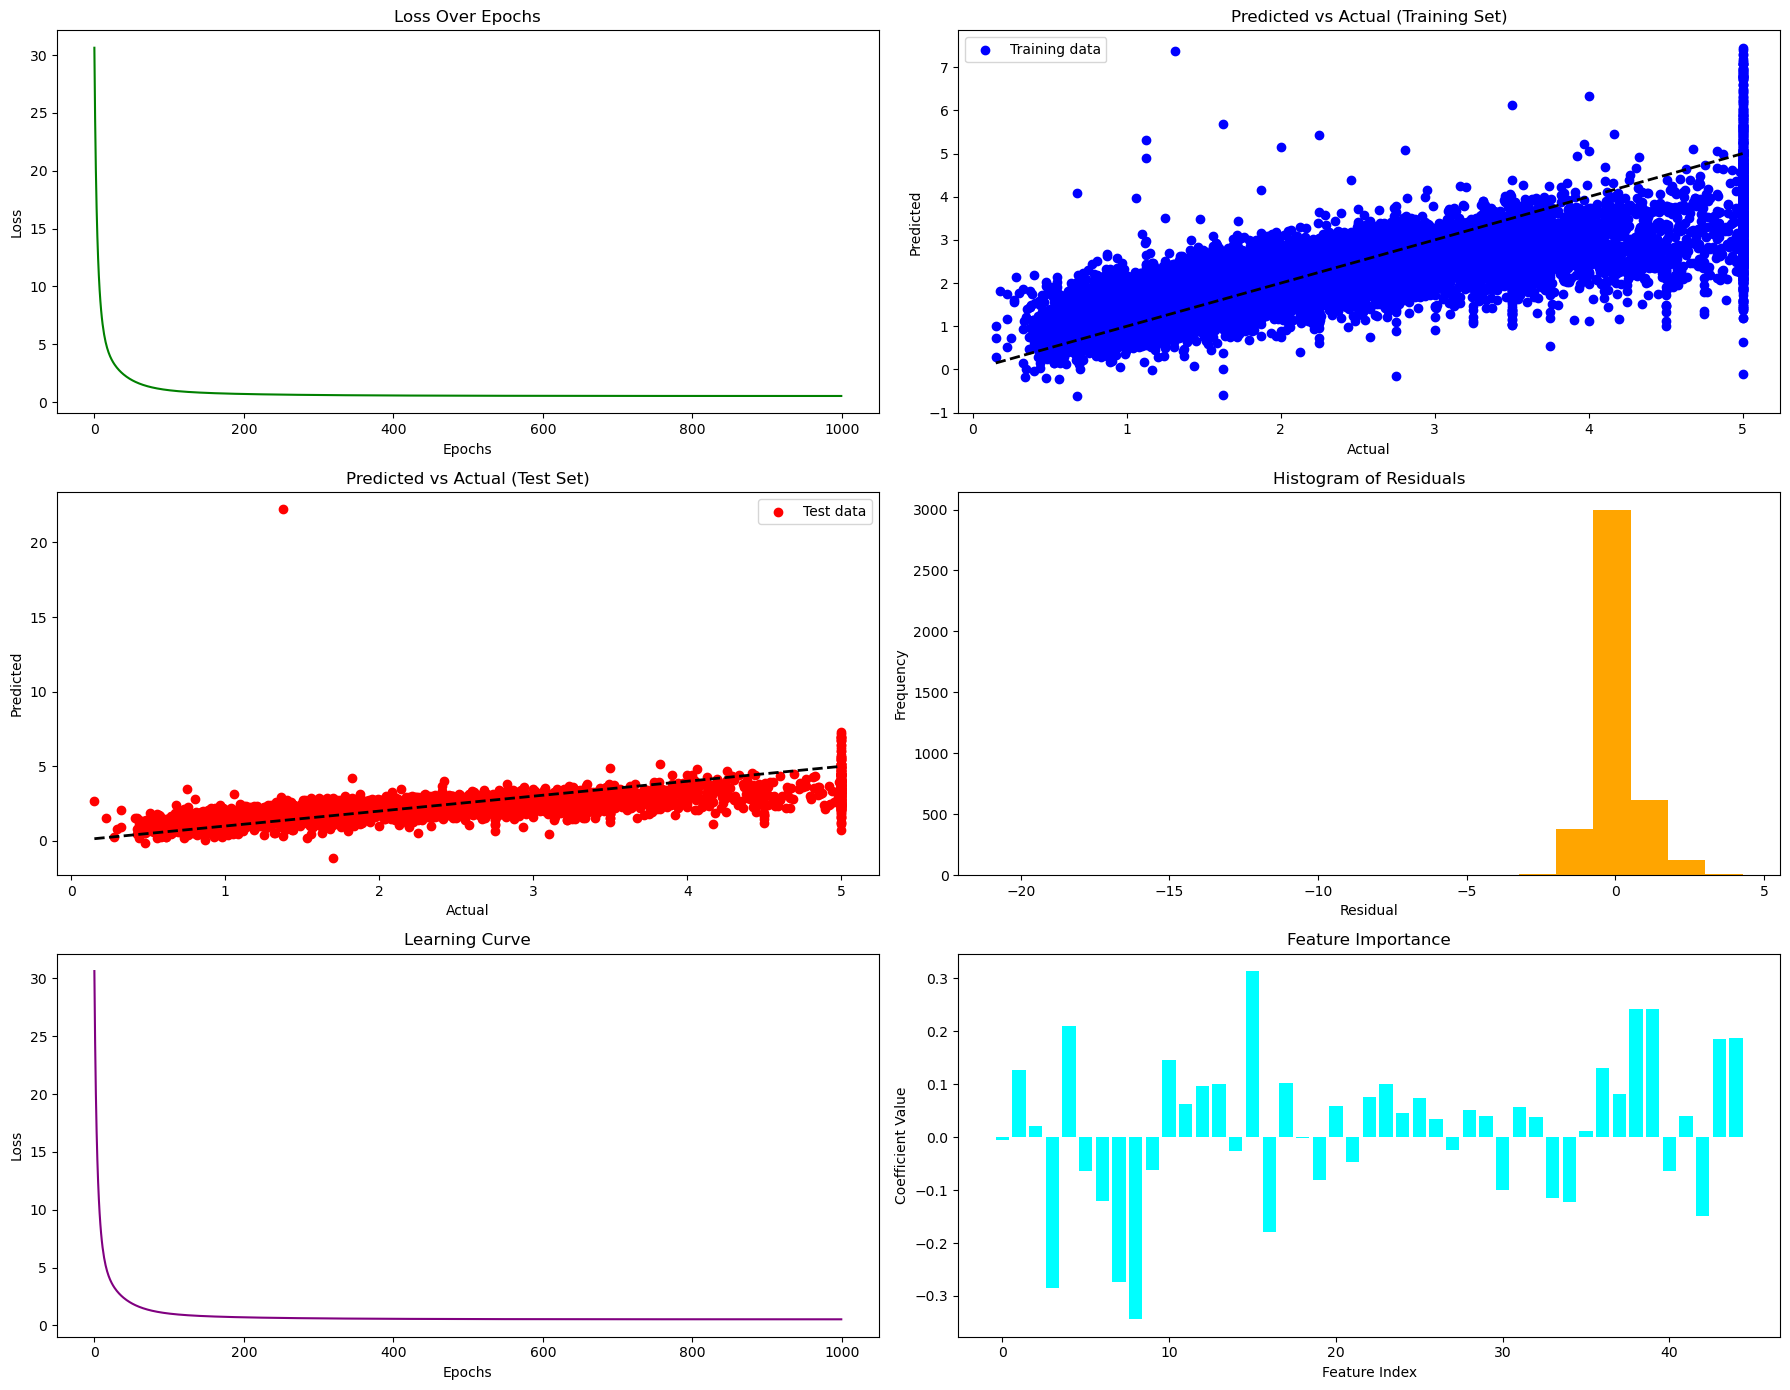

In [72]:
plot_results(x_train, y_train, x_test, y_test, w, b, loss_history)

### **Prediction error analysis**

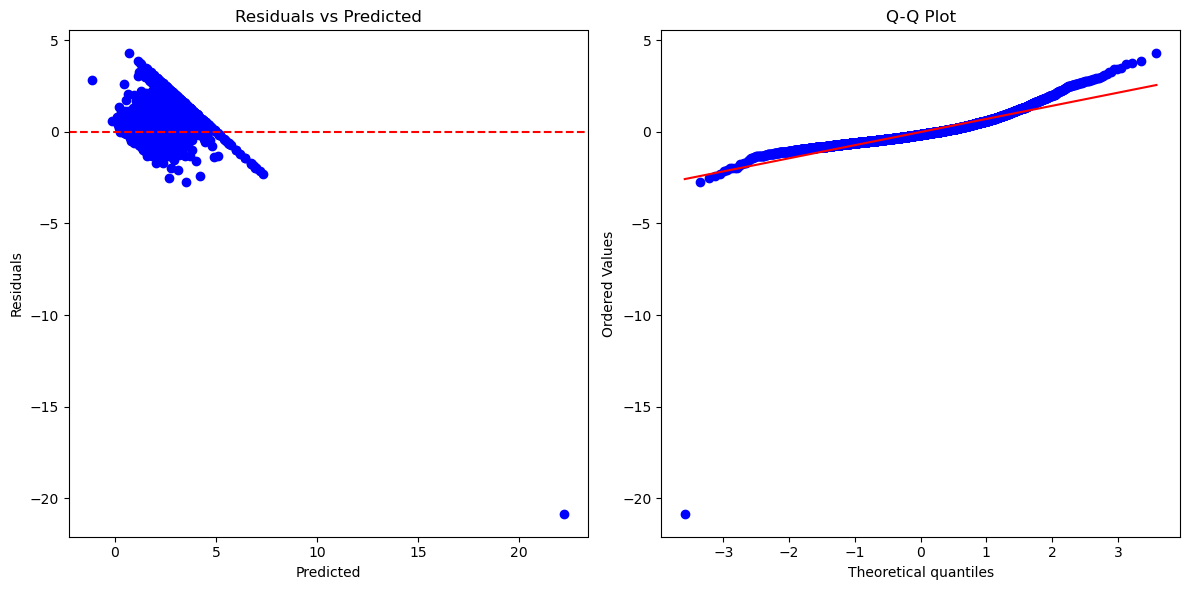

In [73]:
prediction_error_analysis(y_test, y_test_pred)

### **Hyperparameter tuning**

In [74]:
best_params = hyperparameter_tuning(x_train, y_train)

Best Parameters for Ridge Regression: {'alpha': 10.0, 'fit_intercept': True}


### **Regularization comparison**

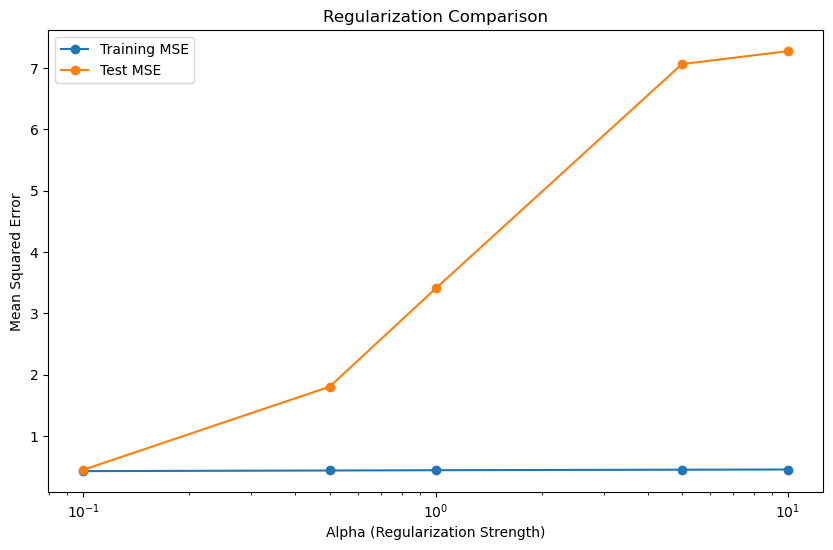

In [75]:
compare_regularization(x_train, y_train, x_test, y_test)

### **Save and Load Model**

In [76]:
save_model(w, b)
loaded_w, loaded_b = load_model()

Model saved to model.pkl
Model loaded from model.pkl
